# Census Income

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state


In [19]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [176]:
# reading the csv file 
cens_df=pd.read_csv('census_income.csv')
cens_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# checking for dimensions of dataset
cens_df.shape

(32560, 15)

here, there are 32560 rows and 15 columns in the dataset

In [7]:
# checking the datatype in each column
cens_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [151]:
# checking for null values in the dataset
cens_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here in the dataset there are no null values but we need to check for duplicate as well as missing values

In [9]:
# printing the information of the dataset
cens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# finding the mathematical values
cens_df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Following observations are made in this step –

- The age column has a range of 17 to 90.

- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705

- The education number has a range of 1 to 16

- The capital gain starts from 0 and ends at 99999

- The capital loss starts at 0 and ends at 4356

- Hours per week range between 1–99.

- There are outliers expected in Capital gain column as the values till 75% are 0. Same is the case with capital loss as well.

- The fnlwgt column also has a huge difference between 75% values and the max value. There is a chance of getting outliers here.

<AxesSubplot:xlabel='Age', ylabel='Density'>

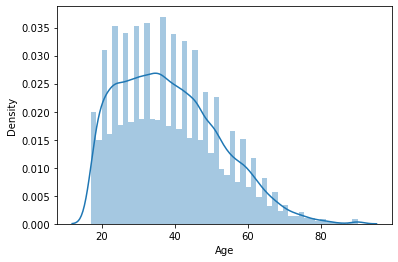

In [20]:
#distribution plot for the age column
sns.distplot(cens_df.Age)

We observe that our data is has right skewness, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases.

We also observe that we do not have any null values in the age column.

In [21]:
# workclass column
cens_df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

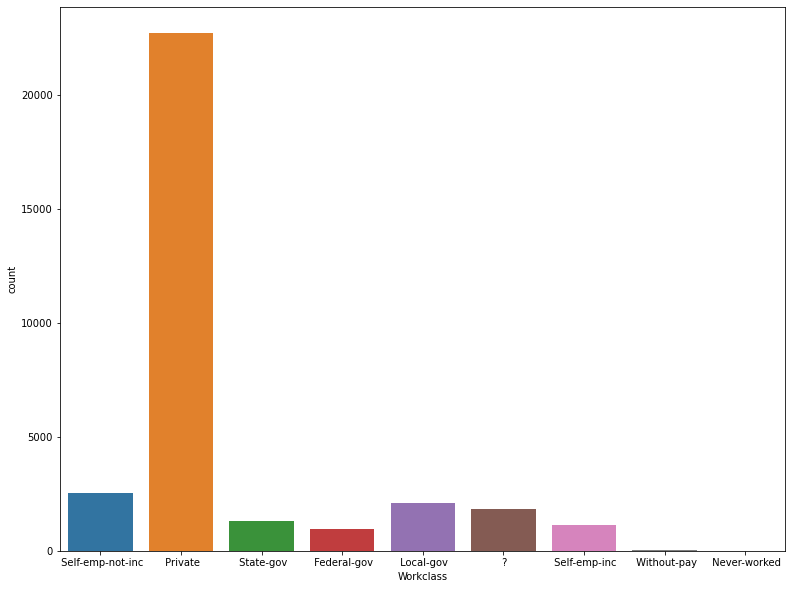

In [26]:
# count plotting for workclass
plt.figure(figsize=(13,10))
sns.countplot(cens_df.Workclass)

From the graph above we can see workclass for private sector is maximum and some values are missing ?

In [27]:
# Education column
cens_df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

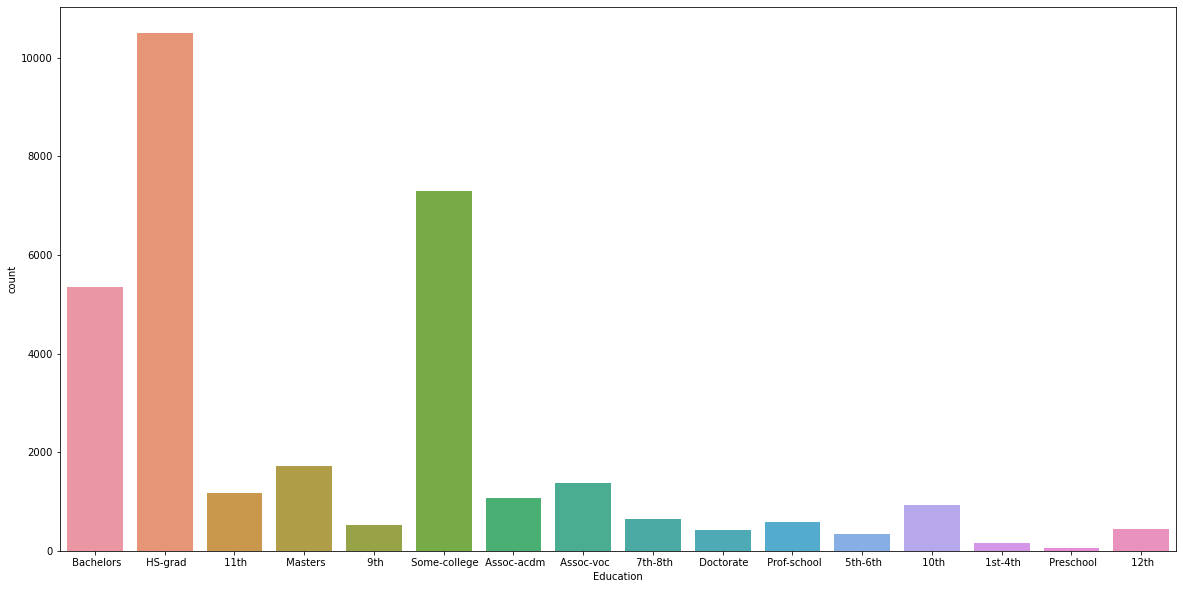

In [30]:
# count plot for education
plt.figure(figsize=(20,10))
sns.countplot(cens_df.Education)

We observe no missing values in this column, and also find out that majority of the people have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

In [31]:
# Education_num column
cens_df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

<AxesSubplot:xlabel='Education_num', ylabel='count'>

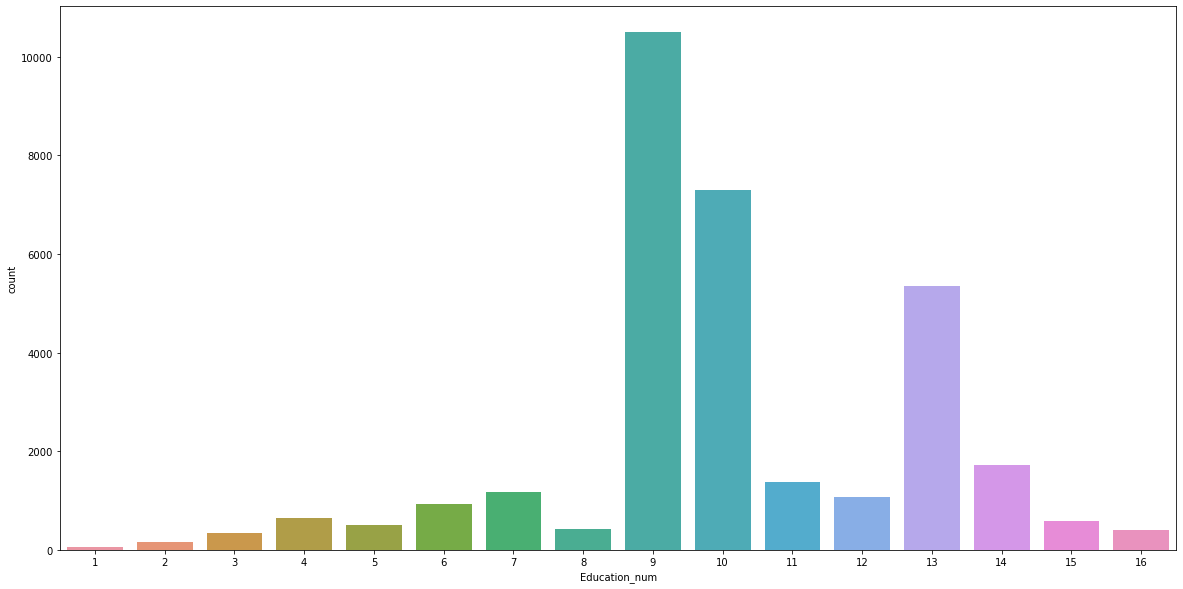

In [32]:
# count plot for education num
plt.figure(figsize=(20,10))
sns.countplot(cens_df.Education_num)

In [33]:
# marital status column
cens_df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

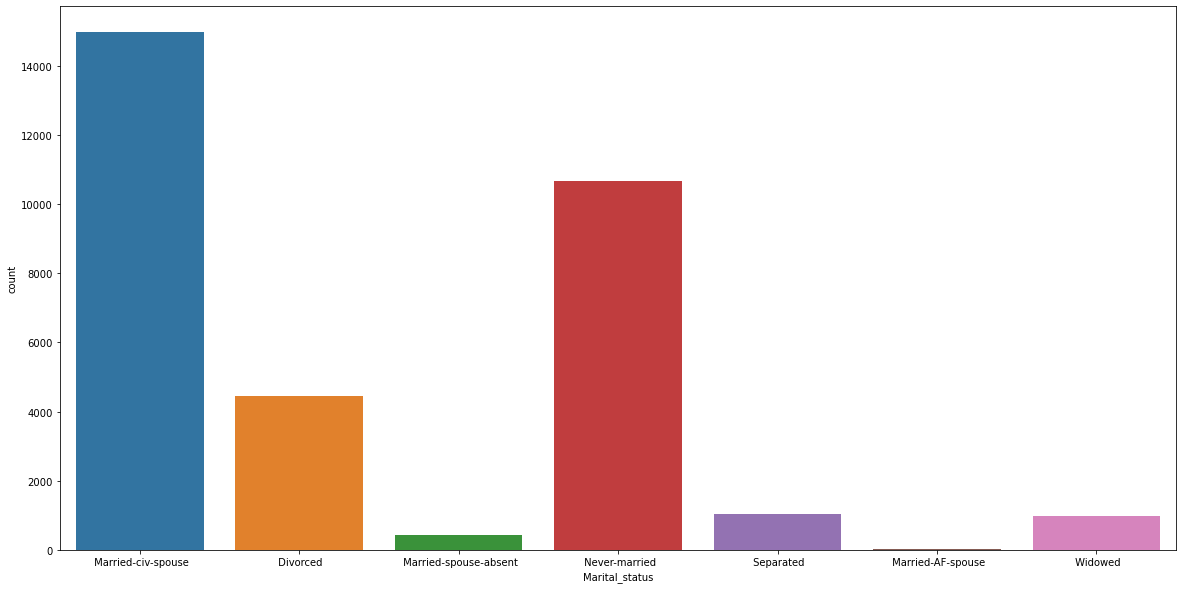

In [34]:
# count plot for Marital Status
plt.figure(figsize=(20,10))
sns.countplot(cens_df.Marital_status)

Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’.

Count of ‘Never-married’ is also quite high

In [36]:
# Occupation column
cens_df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

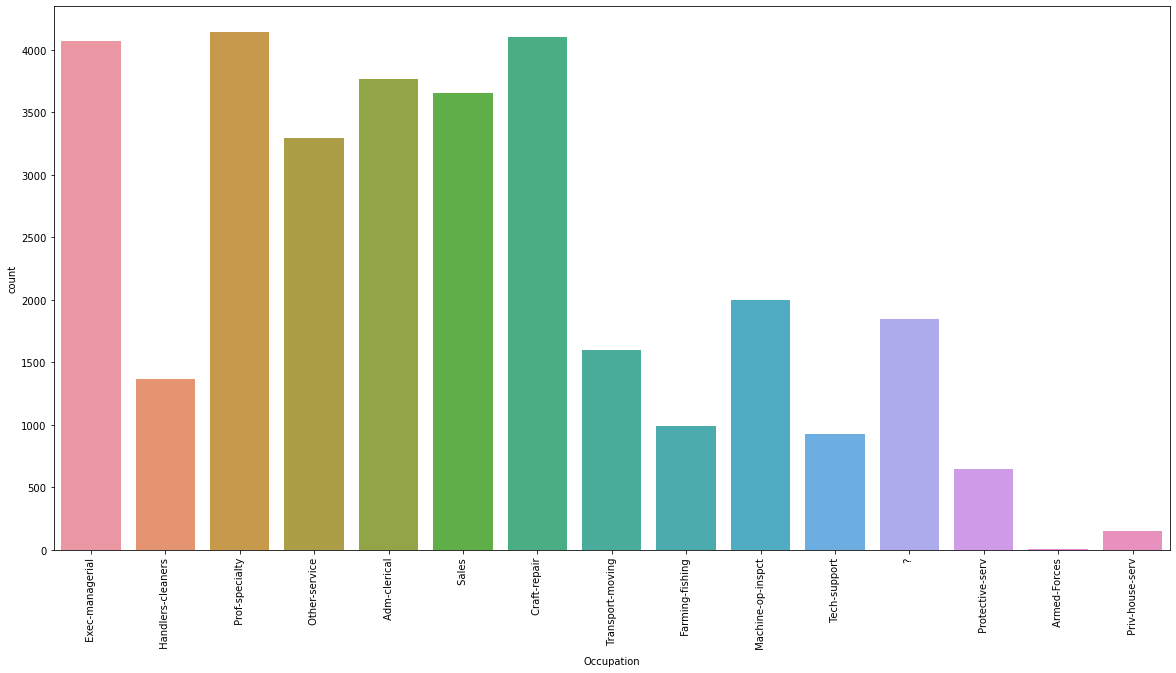

In [38]:
# count plot for Occupation
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(cens_df.Occupation)


<AxesSubplot:xlabel='Relationship', ylabel='count'>

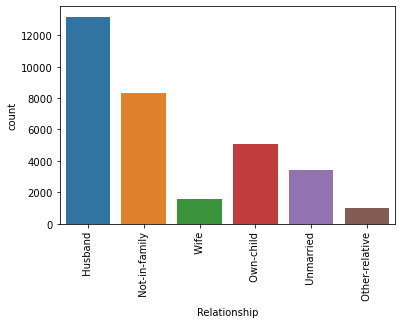

In [39]:
# relationship column count plot
plt.xticks(rotation=90)
sns.countplot(cens_df.Relationship)


here relationship column contains 6 different types of values, with highest number set for ‘Husband’ and lowest for ‘Other-relative’. The column does not have any missing value

<AxesSubplot:xlabel='Race', ylabel='count'>

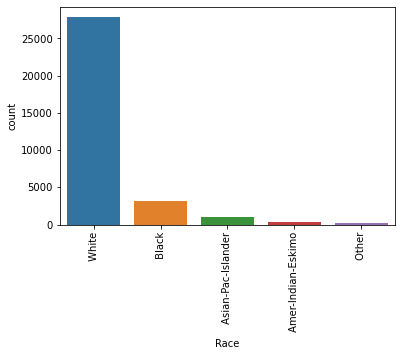

In [40]:
# Race column count plot
plt.xticks(rotation=90)
sns.countplot(cens_df.Race)


The Race column has 5 different categories, and no missing data. Highest number of people have race as ‘White’ (significantly high numbers).

<AxesSubplot:xlabel='Sex', ylabel='count'>

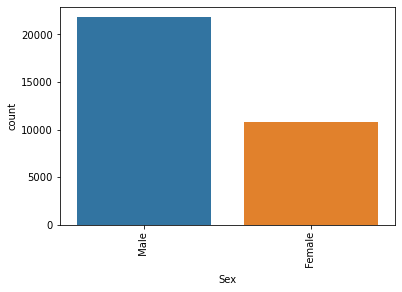

In [41]:
# count of sex column
plt.xticks(rotation=90)
sns.countplot(cens_df.Sex)

The ‘Sex’ column has 2 categories — Male and Female, where number of males are almost double to number of females. Missing values are not found in this column

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

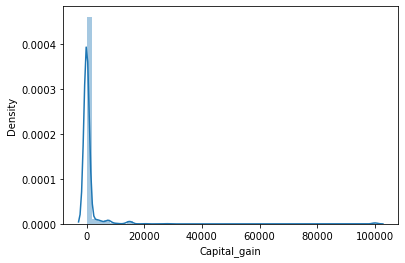

In [43]:
# capital gain column
sns.distplot(cens_df.Capital_gain)

‘Capital_gain’ column is a numeric column, with majority of the values set as 0. The distribution plot for ‘Capital_gain’ column is highly right skewed.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

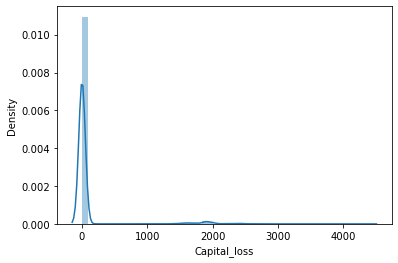

In [44]:
#Capital Loss column
sns.distplot(cens_df.Capital_loss)

The ‘Capital_loss’ column also has majority of the values set as 0, similar to ‘Capital_gains’. The data is highly right skewed in this case as well.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

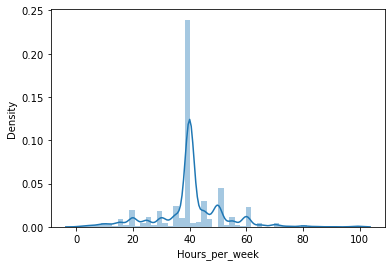

In [45]:
#Hours per week column
sns.distplot(cens_df.Hours_per_week)

The hours per week column has values scattered over a range of 1–99. The column does not have any missing values. Majority of the values have data near 40 hours and hence a high peak can be observed in the above distribution plot

<AxesSubplot:xlabel='Native_country', ylabel='count'>

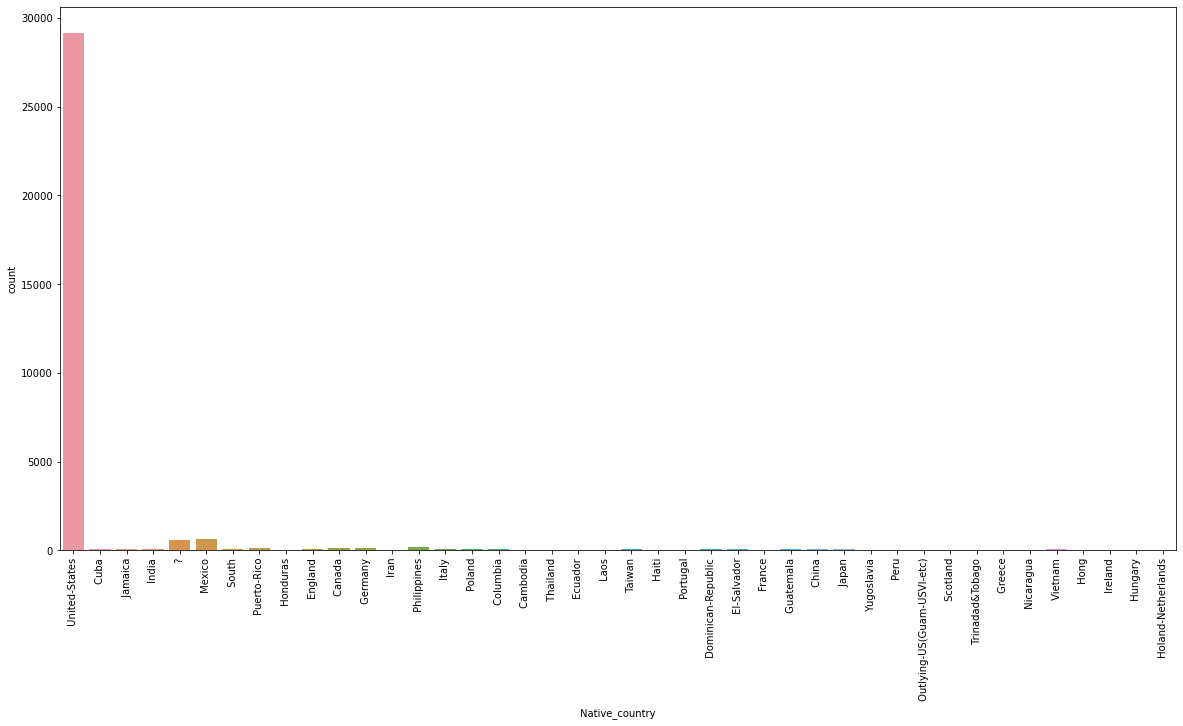

In [51]:
#Native_country column
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(cens_df.Native_country)



The Native_country column contains the highest count set to ‘United-States’, and rest of the rows contain quite few numbers (highest count after US is 643).

This column can have the missing values

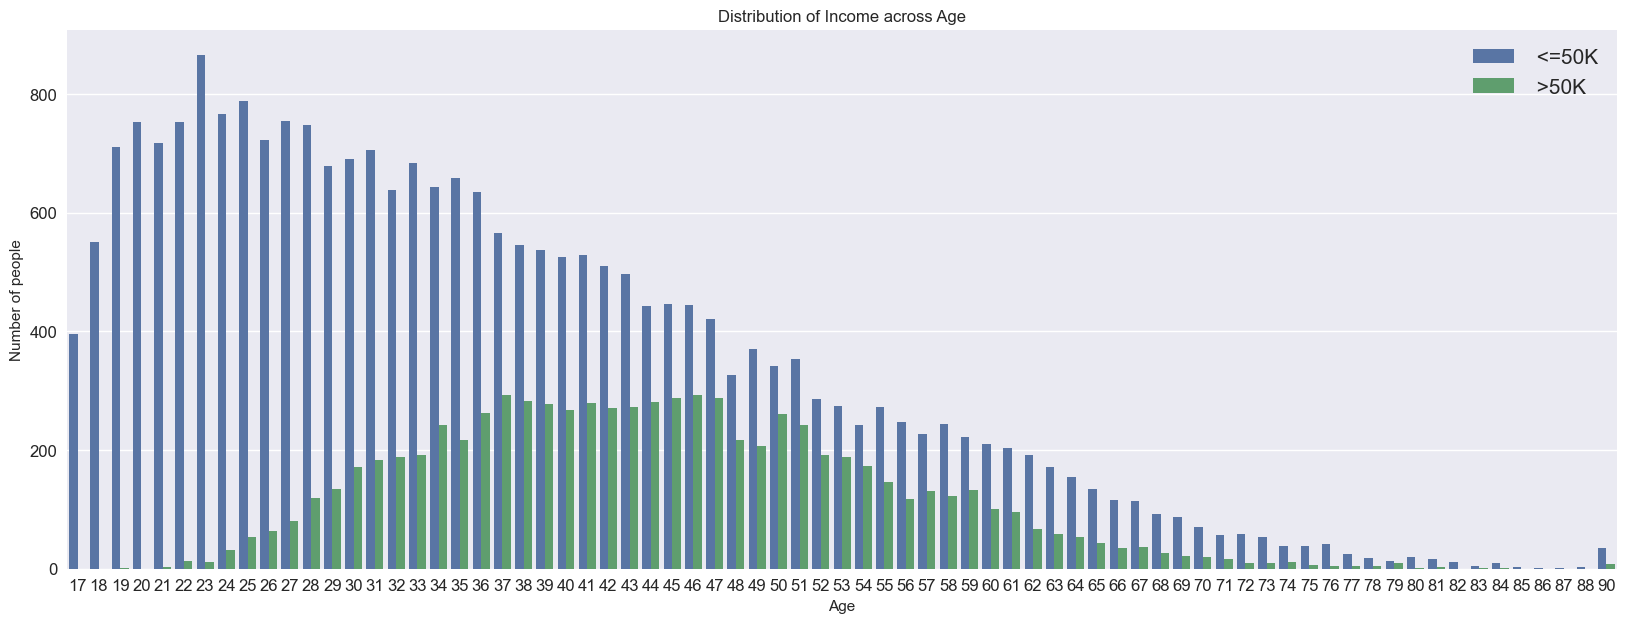

In [155]:
# Creating a countplot of income across age

plt.figure(figsize=(20, 7))
sns.countplot(cens_df['Age'], hue=cens_df['Income'])
plt.title('Distribution of Income across Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

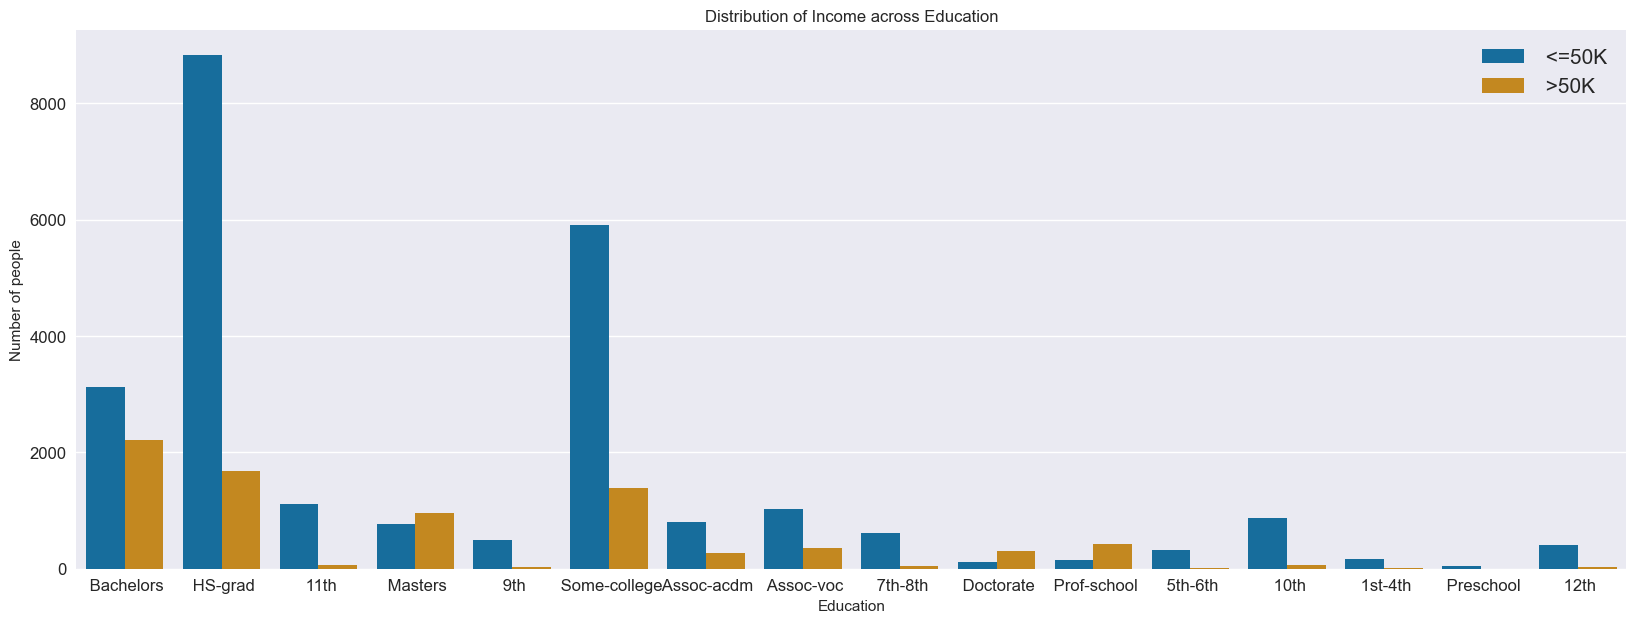

In [154]:
# Creating a countplot of income across education

plt.figure(figsize=(20, 7))
sns.countplot(cens_df['Education'],
              hue=cens_df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

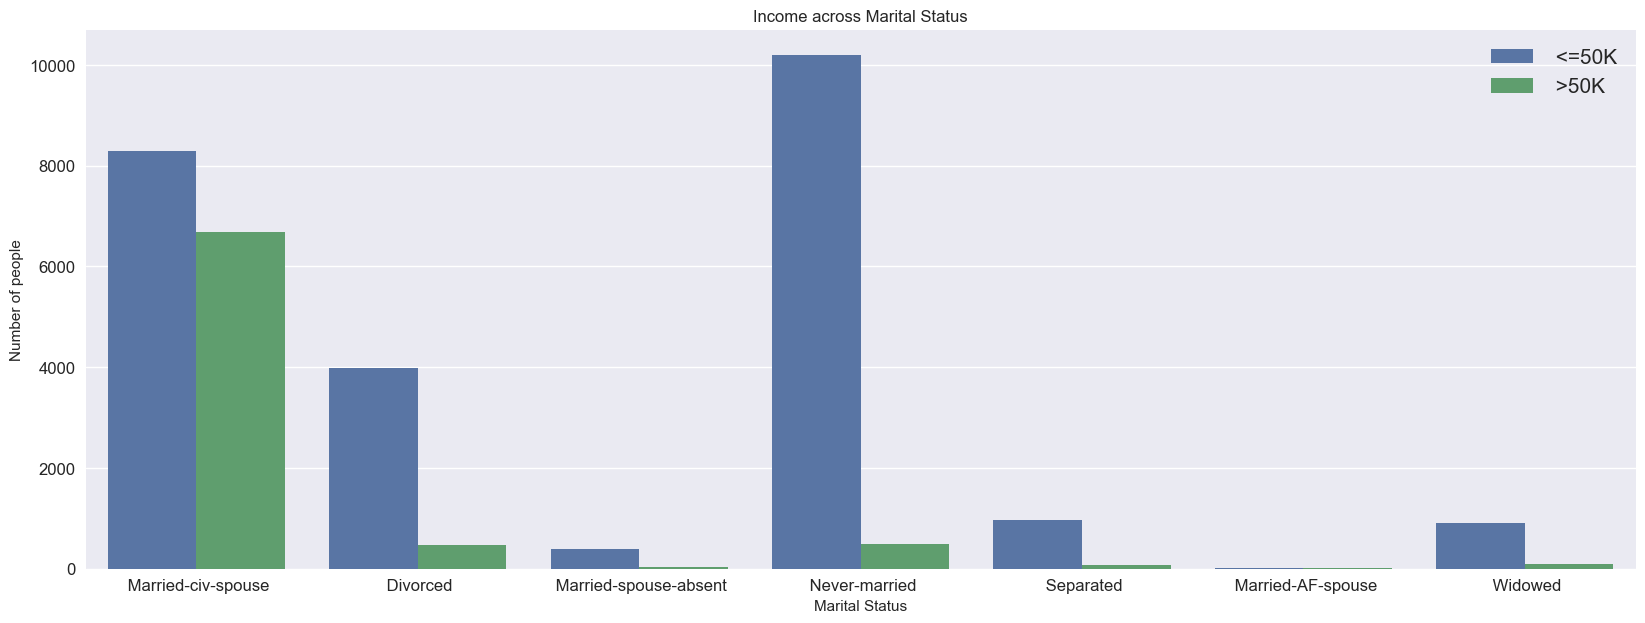

In [156]:
# Creating a countplot of income across Marital Status

plt.figure(figsize=(20, 7))
sns.countplot(cens_df['Marital_status'], hue=cens_df['Income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

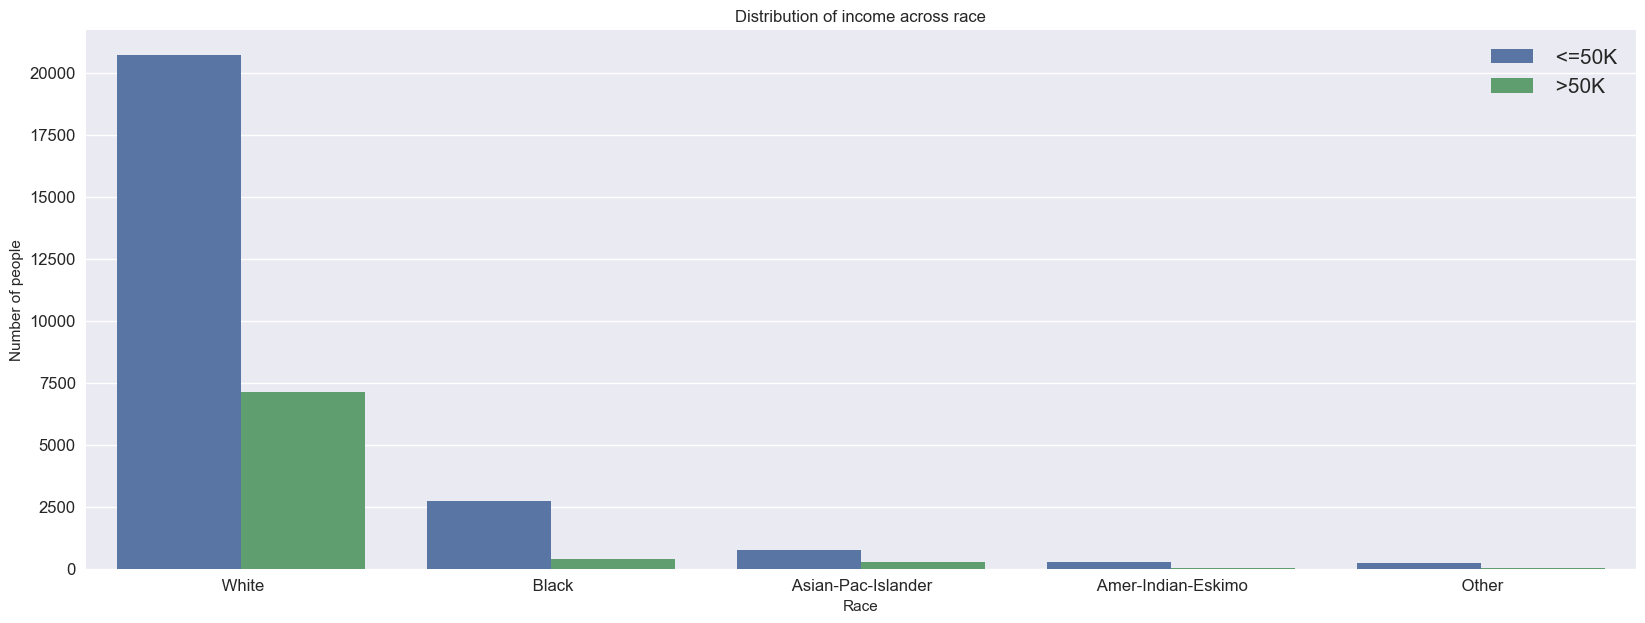

In [157]:
# Creating a countplot of income across race

plt.figure(figsize=(20, 7))
sns.countplot(cens_df['Race'], hue=cens_df['Income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

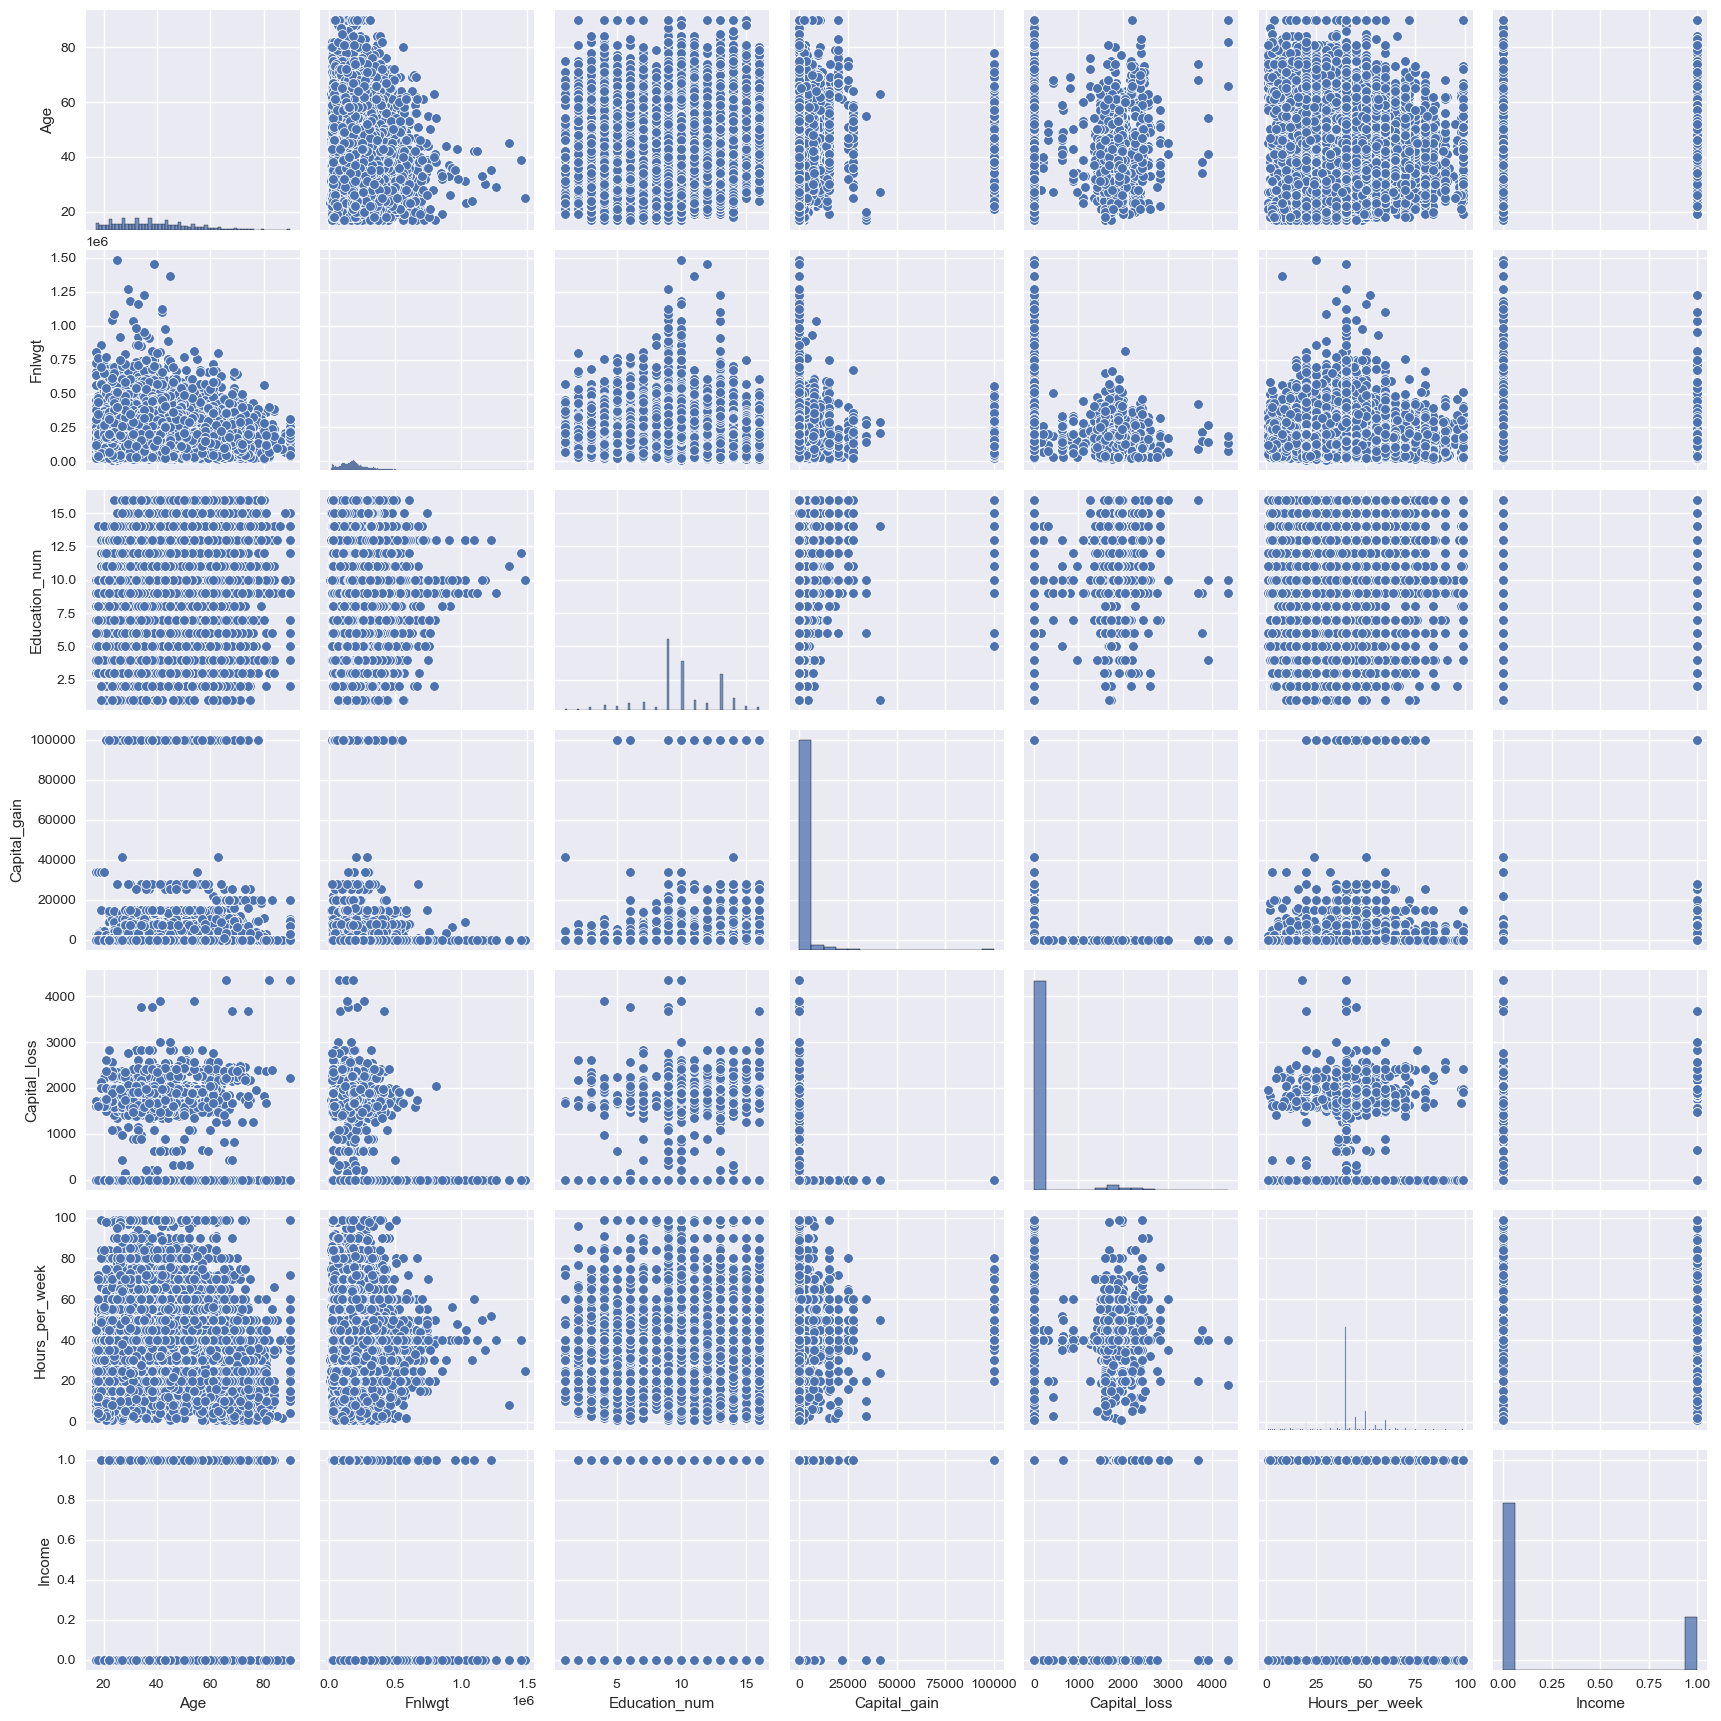

In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cens_df['Income'] = le.fit_transform(cens_df['Income'])
# Creating a pairplot of dataset
sns.pairplot(cens_df)
plt.savefig('multi1.png')
plt.show()

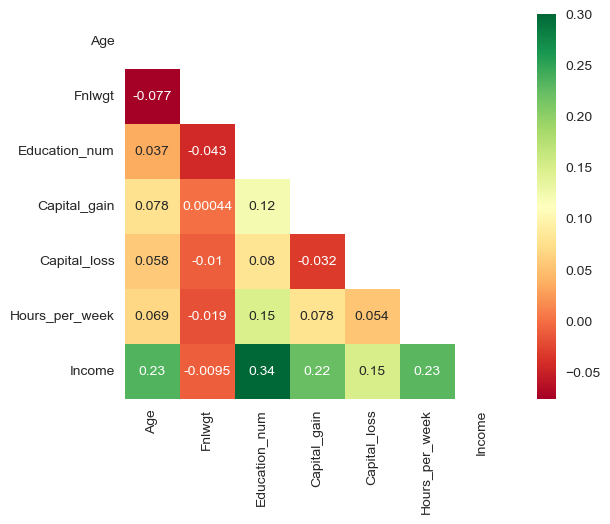

In [162]:
corr =cens_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

In [177]:
dataset = cens_df.replace('?', np.nan)
# Checking null values
round((cens_df.isnull().sum() /cens_df.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [178]:
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']
for col in columns_with_nan:
    dataset[col].fillna(cens_df[col].mode()[0], inplace=True)

In [179]:
from sklearn.preprocessing import LabelEncoder
for col in cens_df.columns:
    if cens_df[col].dtypes == 'object':
        encoder = LabelEncoder()
        cens_df[col] = encoder.fit_transform(dataset[col])

In [180]:
X = cens_df.drop('Income', axis=1)
Y = cens_df['Income']
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [181]:
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.36
1 4.45
2 16.52
3 3.56
4 8.98
5 7.33
6 7.48
7 9.46
8 1.45
9 2.7
10 8.84
11 2.77
12 9.36
13 1.74


In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [183]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

In [184]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))


In [185]:
#Fixing imbalanced dataset using Oversampling
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income, dtype: object

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [189]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (26048, 8)
X_test shape: (6512, 8)
Y_train shape: (26048,)
Y_test shape: (6512,)


In [212]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)


LogisticRegression(random_state=42)

In [213]:
Y_pred_log_reg = log_reg.predict(X_test)

# Logistic Regression Evalulation
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 81.65
F1 score: 54.16


In [192]:
#KNN Classifier

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [214]:
Y_pred_knn = knn.predict(X_test)
# KNN Classifier Evalulation
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.22
F1 score: 63.7


In [195]:
#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [215]:
Y_pred_svc = svc.predict(X_test)
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 84.49
F1 score: 62.73


In [197]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [216]:
Y_pred_nb = nb.predict(X_test)
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 79.51
F1 score: 36.05


In [199]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [217]:
Y_pred_dec_tree = dec_tree.predict(X_test)
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 79.47
F1 score: 59.05


In [201]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [202]:
Y_pred_ran_for = ran_for.predict(X_test)

In [208]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 84.31
F1 score: 65.43


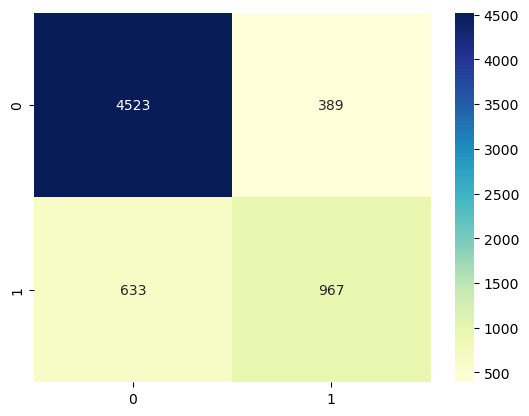

In [210]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ran_for)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [211]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4912
           1       0.71      0.60      0.65      1600

    accuracy                           0.84      6512
   macro avg       0.80      0.76      0.78      6512
weighted avg       0.84      0.84      0.84      6512



Conclusion:


In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier .

A hyperparameter tuned random forest classifier gives the highest accuracy score of 84% and f1 score of 65

Thank you!!